<a href="https://colab.research.google.com/github/SumeyyeSuslu/regression/blob/main/keras_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

Sat Jul 23 20:35:12 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   41C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from tensorflow.keras.datasets import boston_housing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from keras import backend as K

import pandas as pd


In [ ]:
 #Load data
(x_train, y_train), (x_test, y_test) = boston_housing.load_data()
x_train = x_train.astype("float32")
x_test = x_test.astype("float32")
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')


65536/57026 [==================================] - 0s 0us/step
404 train samples
102 test samples


In [ ]:


df = pd.DataFrame(x_train, columns = ['crim',
 'zn',
 'indus',
 'chas',
 'nox',
 'rm',
 'age',
 'dis',
 'rad',
 'tax',
 'ptratio',
 'b',
 'lstat'])


df.head(5)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.004833,0.000000,0.031922,0.0,0.002110,0.024086,0.359608,0.015596,0.015686,1.203922,0.082353,1.556471,0.073412
1,0.000085,0.323529,0.007961,0.0,0.001627,0.029843,0.061569,0.024588,0.007843,1.364706,0.057647,1.550510,0.012196
2,0.019209,0.000000,0.070980,0.0,0.002475,0.019490,0.392157,0.005225,0.094118,2.611765,0.079216,1.472627,0.012784
3,0.000155,0.000000,0.020353,0.0,0.002020,0.023675,0.135294,0.023472,0.019608,0.878431,0.079216,1.556471,0.031412
4,0.014483,0.000000,0.070980,0.0,0.002796,0.025004,0.346667,0.010067,0.094118,2.611765,0.079216,1.535020,0.057451


In [ ]:
#https://jmlb.github.io/ml/2017/03/20/CoeffDetermination_CustomMetric4Keras/
def R2(y_true, y_pred):
    SS_res =  K.sum(K.square( y_true-y_pred )) 
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) ) 
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )
def rmse(y_true, y_pred):
	return K.sqrt(K.mean(K.square(y_pred - y_true), axis=-1))
 

In [ ]:
# Define basic parameters
model = Sequential()
model.add(Dense(64, input_shape=(x_train.shape[1],)))
model.add(Activation('relu'))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dense(1))

model.compile(
    optimizer=Adam(learning_rate=0.01),
    loss='mean_absolute_error',
    metrics=[rmse,R2])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                896       
                                                                 
 activation (Activation)     (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 activation_1 (Activation)   (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(
    x_train,
    y_train,
    epochs=200,
    verbose=1,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)



Epoch 1/200
11/11 [==============================] - 3s 21ms/step - loss: 18.8067 - rmse: 18.8067 - R2: -5.2979 - val_loss: 12.0610 - val_rmse: 12.0610 - val_R2: -2.1439
Epoch 2/200
11/11 [==============================] - 0s 5ms/step - loss: 9.7820 - rmse: 9.7820 - R2: -1.3217 - val_loss: 8.1755 - val_rmse: 8.1755 - val_R2: -0.5928
Epoch 3/200
11/11 [==============================] - 0s 5ms/step - loss: 8.0344 - rmse: 8.0344 - R2: -8.3026 - val_loss: 7.9290 - val_rmse: 7.9290 - val_R2: -0.4753
Epoch 4/200
11/11 [==============================] - 0s 5ms/step - loss: 7.0777 - rmse: 7.0777 - R2: -0.1427 - val_loss: 6.8608 - val_rmse: 6.8608 - val_R2: -0.0548
Epoch 5/200
11/11 [==============================] - 0s 6ms/step - loss: 5.9665 - rmse: 5.9665 - R2: -0.0554 - val_loss: 6.4941 - val_rmse: 6.4941 - val_R2: -0.0522
Epoch 6/200
11/11 [==============================] - 0s 5ms/step - loss: 5.5262 - rmse: 5.5262 - R2: 0.1490 - val_loss: 5.7241 - val_rmse: 5.7241 - val_R2: 0.2116
Epoch 7

In [ ]:
from keras.models import model_from_json
# serialize model to json
json_model = model.to_json()
#save the model architecture to JSON file
with open('boston_model.json', 'w') as json_file:
    json_file.write(json_model)
#saving the weights of the model
model.save_weights('boston_weights.h5')

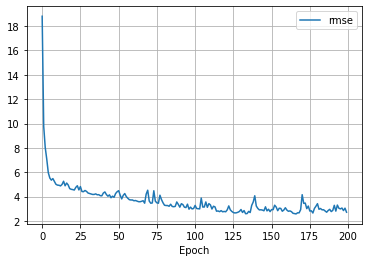

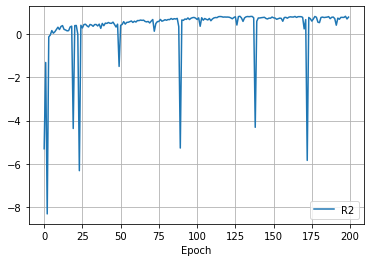

In [ ]:
# plot metrics
plt.figure(1)
plt.plot(history.history['rmse'],label='rmse')
plt.xlabel('Epoch')
plt.legend()
plt.grid(True)
plt.figure(2)
plt.plot(history.history['R2'],label='R2')
plt.xlabel('Epoch')
plt.legend()
plt.grid(True)